# Mobile Price Classification

## Limpieza de Datos y EDA (Análisis Exploratorio de Datos)

### Líbrerías necesarias para nuestro proyecto

In [60]:
# Librerías necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Configuración para la visualización de datos
sns.set_style('whitegrid')
%matplotlib inline

### Cargamos el dataset y obtenemos la información básica de este

In [62]:
# Cargar dataset
df = pd.read_csv("mobile_train.csv")

Siempre se hace el EDA y limpieza de datos sobre el dataset de entrenamiento, ya que los valores de test deben ser desconocidos para estudiar estadísticamente y optimizar el modelo.

In [63]:
# Obtenemos el número de filas y columnas de nuestro dataset
print("Shape:", df.shape)

Shape: (2000, 21)


In [64]:
# Observamos las primeras cinco columnas 
# Para obervar más de cinco columnas, simplemente cambiamos el valor por defecto de head
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [65]:
# Obtenemos la información básica de los datos que vamos a tratar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

El dataset está formado por 2000 filas y 21 columnas.

Encontramos únicamente variables de tipo número, ya sean números enteros (int) o números decimales (float). De haber encontrado varibales categóricas, tan solo hay que verificar que estén como "object" o "category".

In [66]:
# Obtenemos los estadísticas descriptivos de cada una de nuestras variables
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Limpieza del datset

In [67]:
# Comprobamos si existen valores nulos en nuestro dataset para la limpieza de datos
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

En este caso, observamos que no hay valores nulos. Si hubiese habido columnas con valores nulos, hay que decidir si completarlos (con la media, mediana) o eliminarlos. Para este dataset yo hubiese escogido la mediana, ya que comprobaremos más adelnate variables importantes como el RAM tienen outliers.

In [68]:
# Filas duplicadas
df.duplicated().sum()

0

No hay filas duplicadas, por lo que no es necesario eliminar ninguna fila.

In [69]:
# Revisar consistencia de datos
# Mantener solo valores positivos para numéricas críticas
for col in ['ram', 'battery_power', 'px_height', 'px_width']:
    if col in df.columns:
        df = df[df[col] > 0]

En este caso, todos los datos son correctos, pero es una buena práctica ya que un cliente nos puede pasar algún dato que hayan tenido una errata al asiganr el valor, y puede condicionar a mal nuestro estudio.

In [73]:
# Guardar dataset limpio
df.to_csv('mobile_clean.csv', index=False)

In [74]:
# Cargar dataset limpio
df = pd.read_csv('mobile_clean.csv')

### Selección de varibale target

Nuestra varibale target (variable dependiente) en este caso va a ser "price range", que hace referencia a la clase según el rango de precios de un móvil.
Siendo estas:
· 0	Bajo (móviles económicos)
· 1	Medio-bajo
· 2	Medio-alto
· 3	Alto (móviles más caros)

**Distribución del rango de precio de los móviles**

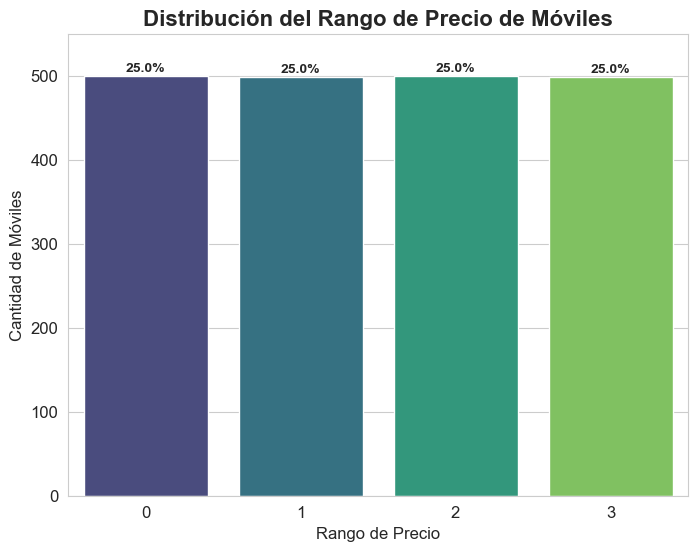

In [75]:
plt.figure(figsize=(8,6))

# Conteo de cada clase
counts = df['price_range'].value_counts().sort_index()
total = counts.sum()

# Gráfico de barras con Seaborn
barplot = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Añadir el porcentaje de cada clase sobre su barra correspondiente
for i, value in enumerate(counts.values):
    percent = value / total * 100
    barplot.text(i, value + 5, f'{percent:.1f}%', ha='center', fontweight='bold')

# Títulos y etiquetas
plt.title("Distribución del Rango de Precio de Móviles", fontsize=16, fontweight='bold')
plt.xlabel("Rango de Precio", fontsize=12)
plt.ylabel("Cantidad de Móviles", fontsize=12)
plt.ylim(0, counts.max() + 50)  # espacio para los porcentajes sobre las barras
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Las clases (0 a 3) están balanceadas, con la misma cantidad de móviles en cada rango. Esto es un indicador de que no será necesario balancear nuestro datastet a la hora de aplicar modelos de clasificación.

**Correlaciones entre las varibales y con respecto a la la variable target**

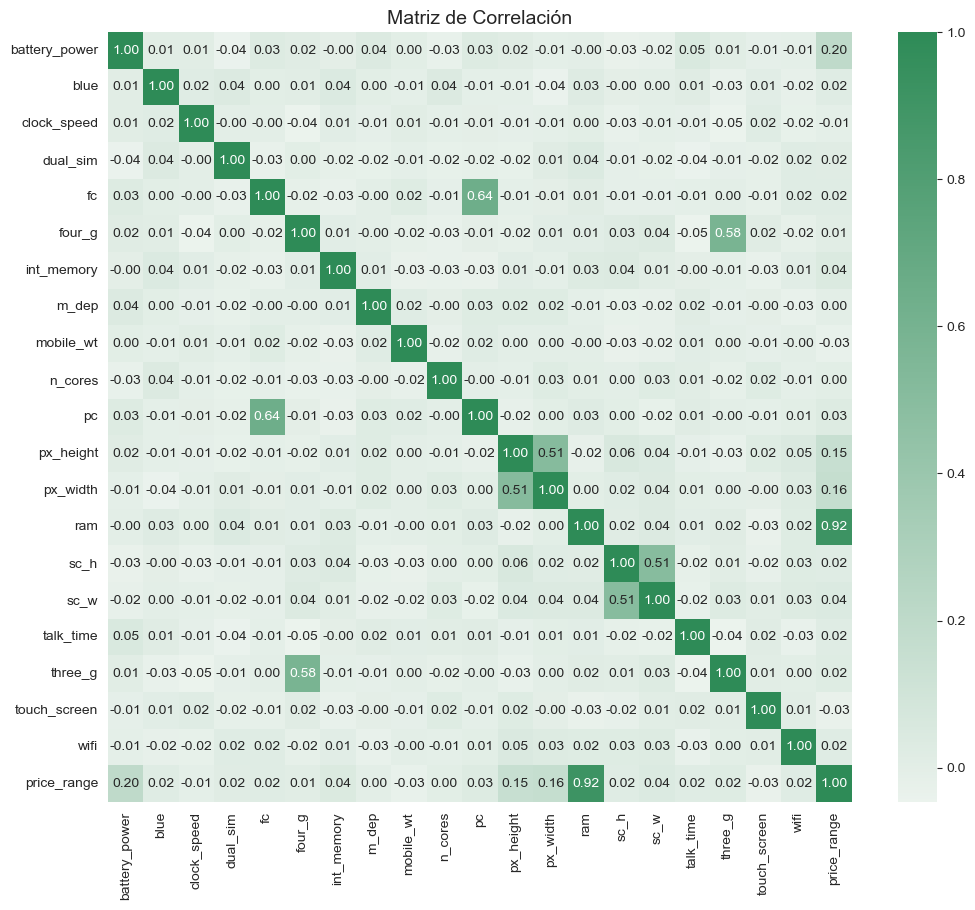

In [76]:
plt.figure(figsize=(12,10))

# Usamos un solo color verde uniforme
green_color = "#2e8b57"
sns.heatmap(df.corr(), annot=True, cmap=sns.light_palette(green_color, as_cmap=True), fmt=".2f")

plt.title("Matriz de Correlación", fontsize=14)
plt.show()

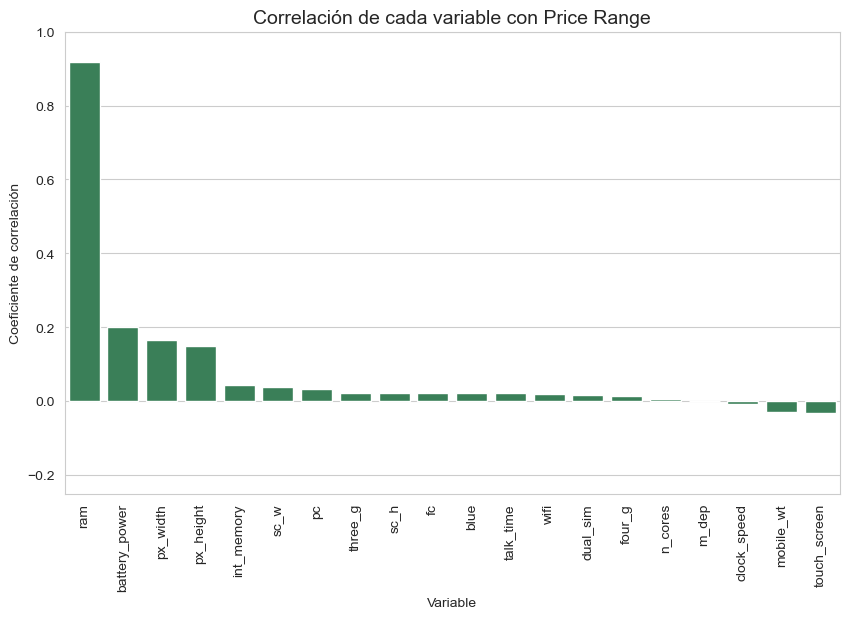

In [77]:
# Correlación de todas las variables con el target, excluyendo 'price_range'
cor_target = df.corr()['price_range'].drop('price_range').sort_values(ascending=False)

plt.figure(figsize=(10,6))

# Color verde uniforme
green_color = "#2e8b57"

# Gráfico de barras
sns.barplot(x=cor_target.index, y=cor_target.values, color=green_color)

# Etiquetas de las variables verticales
plt.xticks(rotation=90, ha='center')

# Títulos y etiquetas
plt.title("Correlación de cada variable con Price Range", fontsize=14)
plt.ylabel("Coeficiente de correlación")
plt.xlabel("Variable")
plt.ylim(-0.25, 1)
plt.show()

· Variables más relevantes para predecir el precio:

Las variables que muestran mayor correlación positiva con price_range son ram, battery_power y, en menor medida, px_height y px_width. Esto indica que los móviles con más memoria RAM y mayor potencia de batería tienden a pertenecer a rangos de precio más altos. La resolución de pantalla también influye, aunque no de manera tan determinante. Estas variables constituyen los principales drivers que nuestro modelo debe aprovechar para predecir correctamente el rango de precio.

· Variables con baja correlación:

Las variables binarias como dual_sim, touch_screen o wifi presentan una correlación baja con el target. Esto significa que, aunque pueden aportar información adicional, no son lo suficientemente discriminantes por sí solas para diferenciar entre los rangos de precio. Su papel será complementario dentro del modelo, ayudando a mejorar la precisión marginalmente junto con las variables más importantes.

· Patrones de multicolinealidad entre features (varibales que se usuarían para entrenar los modelos):

El heatmap muestra que algunas variables numéricas, como px_height y px_width, están altamente correlacionadas entre sí. Esto muestra un posible problema de multicolinealidad, lo que podría afectar a ciertos modelos sensibles a la redundancia de información, como la regresión lineal. Para modelos basados en árboles, esto no es un problema crítico, pero es un aspecto a tener en cuenta para la selección de features y la interpretación de los resultados.

· Implicaciones para el modelado:

Los modelos de clasificación son la mejor opción ya que pueden aprovechar las relaciones entre las features y el target. Variables como ram y battery_power aportan la mayor capacidad predictiva, mientras que las demás variables complementan la información.

**Boxplots de variables numéricas por clase target**

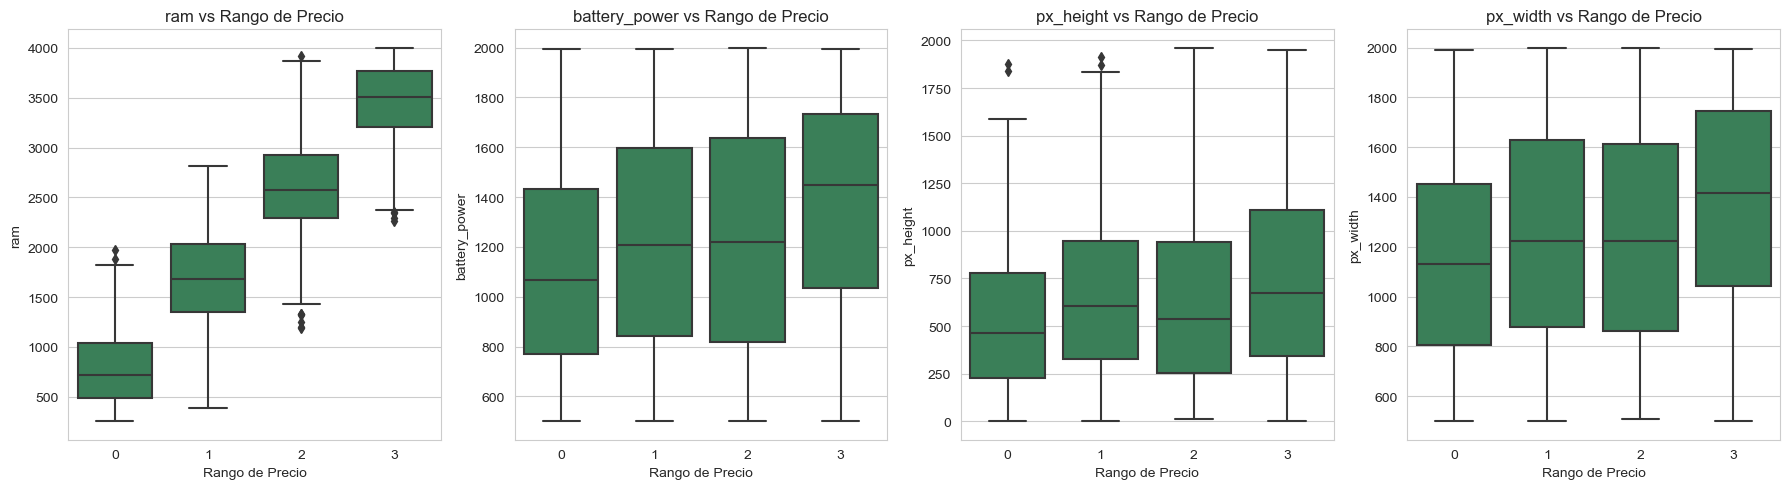

In [78]:
green_color = "#2e8b57"

important_features = ['ram', 'battery_power', 'px_height', 'px_width']

fig, axes = plt.subplots(1, len(important_features), figsize=(18,5))

for i, col in enumerate(important_features):
    sns.boxplot(x='price_range', y=col, data=df, color=green_color, ax=axes[i])
    axes[i].set_title(f"{col} vs Rango de Precio")
    axes[i].set_xlabel("Rango de Precio")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

· RAM

La memoria RAM muestra una relación clara y creciente con el precio: conforme aumenta el rango, también lo hace la mediana de la RAM. Este comportamiento indica que se trata de un factor altamente determinante en la diferenciación de precios. No obstante, en los rangos más bajos aparecen algunos outliers con valores de RAM elevados, lo cual sugiere la existencia de ciertos dispositivos de bajo costo con especificaciones de memoria poco comunes para su segmento.

· Battery Power

La tendencia de la batería es también ascendente, pero mucho menos marcada. Aunque la mediana crece ligeramente con el rango de precio, la dispersión es amplia y se solapan los valores entre las distintas categorías. Esto indica que la capacidad de batería no es un factor tan decisivo en la segmentación por precio.

· Resolución en píxeles

Se observa un comportamiento diferenciado entre la altura ("px_height") y el ancho ("px_width"). La altura muestra gran variabilidad y la existencia de numerosos outliers en los rangos más bajos, lo que resta poder explicativo a esta variable. En cambio, el ancho presenta un patrón más consistente: la mediana aumenta progresivamente con el rango de precio, aunque también con una dispersión considerable. Esto sugiere que la resolución, en especial el ancho en píxeles, guarda una relación más estrecha con la categorización de precios.